## Titanic Dataset EDA and Predictions using LogReg

#### Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 

#### Loadind Titanic Dataset

In [2]:
df = sns.load_dataset('titanic')
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Columns present
* Survived
* Pclass
* Sex
* Age
* Sibsp
* Parch
* Fare
* Embarked
* Class
* Who
* Adult_male
* Deck
* Embark_town
* Alive
* Alone

In [3]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\Abdullah Fazili\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

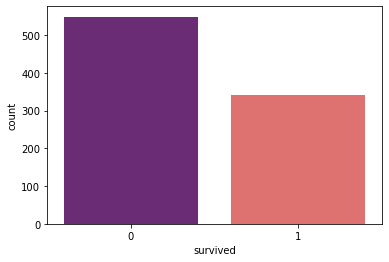

In [4]:
sns.countplot(df['survived'],palette='magma')

C:\Users\Abdullah Fazili\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Abdullah Fazili\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Abdullah Fazili\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C

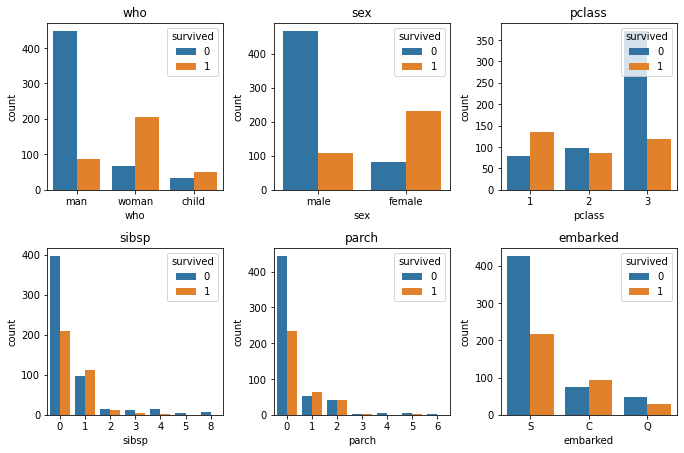

In [5]:
# Visualize the count of survivors for columns 'who', 'sex', 'pclass', 'sibsp', 'parch', and 'embarked'
cols = ['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']

n_rows = 2
n_cols = 3

# The subplot grid and the figure size of each graph
# This returns a Figure (fig) and an Axes Object (axs)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2,n_rows*3.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c #index to go through the number of columns       
        ax = axs[r][c] #Show where to position each subplot
        sns.countplot(df[cols[i]], hue=df["survived"], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="survived", loc='upper right') 
        
plt.tight_layout()   #tight_layout

<AxesSubplot:xlabel='class', ylabel='survived'>

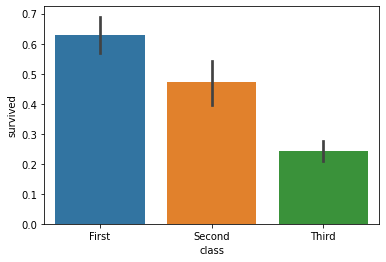

In [6]:
sns.barplot(x='class', y='survived', data=df)

### Preprocessing the data

In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
df['age'].fillna(df['age'].median(), inplace = True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace = True)

In [9]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
df.shape

(891, 15)

In [11]:
df = df.drop(['deck', 'embark_town', 'alive', 'class', 'alone', 'adult_male', 'who'], axis=1)

In [12]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
df.shape

(891, 8)

In [14]:
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [15]:
df.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

###  Non Numeric Data

In [16]:
print(df['sex'].unique())
print(df['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


### Encoding to numeic data

In [17]:
LE = LabelEncoder()

#Encoding sex to numeric data
df.iloc[:,2]=LE.fit_transform(df.iloc[:,2].values)
#Encoding embarked to numeric data
df.iloc[:,-1]=LE.fit_transform(df.iloc[:,-1].values)

In [18]:
df.iloc[:,2]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: sex, Length: 891, dtype: int32

In [19]:
df.iloc[:,-1]

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: embarked, Length: 891, dtype: int32

In [20]:
print(df['sex'].unique())
print(df['embarked'].unique())

[1 0]
[2 0 1]


### Splitting data to dependent var and independent var
1. All columns except survived will act as dependent variiables

In [21]:
X = df.iloc[:,1:].values
Y = df.iloc[:,:1].values
print(X[0])
print(Y[0])

[ 3.    1.   22.    1.    0.    7.25  2.  ]
[0]


### Dependent variables
*pclass	sex	age	sibsp	parch	fare	embarked*
### Independent variable
*survived*

## Splitting Data to dependent and Independent Var

In [22]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)

### Scaling the data(Feature Scaling)

In [23]:
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
Y_test  = SC.fit_transform(Y_test)

### Log Reg model

In [24]:
model = LogisticRegression(random_state=42)
model.fit(X_train,Y_train)

C:\Users\Abdullah Fazili\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=42)

In [25]:
print('Training Accuracy:', model.score(X_train, Y_train))

Training Accuracy: 0.800561797752809


In [26]:
predictions = model.predict(X_test)
predictions


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [37]:
df['embarked'].unique()

array([2, 0, 1])

### Predictions
1. Pclass can be 1 2 3
2. sex can be 0 1
3. age put your age as float like 23.0
4. sibsp means siblings or spouse with you it can have any any value like  0 1 2 3 4 ..
5. parch means parents and childrens with you it can have any any value like 0 1 2 3 4 .. 
6. fare any float min = 0.0 to max 513.0
7. embarked station 0 ,1, 2

*Pass into an array*

In [39]:
my_condition =[[3,1,23.0,0,0,0,3]]
pred = model.predict(my_condition)
print(pred)

if pred == 0:
    print("You didn't survived")
else:
    print("You survived")

[0]
You didn't survived


### Saving Model


In [46]:
from joblib import Parallel, delayed
import joblib

joblib.dump(model,'model.pkl')

['model.pkl']